In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_name_recipe = "PP_recipes"
file_name_users = "PP_users"
file_name_raw_interaction = "RAW_interactions"
file_name_raw_recipes = "RAW_recipes"
csv_extension = ".csv"
directory = "datasets/"

In [5]:
df_recipe = pd.read_csv(directory + file_name_recipe + csv_extension)
df_user = pd.read_csv(directory + file_name_users + csv_extension)
df_raw_interaction = pd.read_csv(directory + file_name_raw_interaction + csv_extension)
df_raw_recipes = pd.read_csv(directory + file_name_raw_recipes + csv_extension)

In [6]:
df_raw_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
print(len(df_raw_interaction))
nbr_review = df_raw_interaction['user_id'].value_counts()
nbr_recipe = df_raw_interaction['recipe_id'].value_counts()
user_to_keep = []
recipe_to_keep = []
for user, review in nbr_review.iteritems():
    if review>100:
        user_to_keep.append(user)

for recipe, review in nbr_recipe.iteritems():
    if review>10:
        recipe_to_keep.append(recipe)

df_filtered = df_raw_interaction[(df_raw_interaction['user_id'].isin(user_to_keep)) & (df_raw_interaction['recipe_id'].isin(recipe_to_keep))]
print(len(df_filtered))
#print(df_filtered['user_id'].value_counts())

1132367
203301


In [8]:
df_filtered.groupby('user_id')

In [9]:
df_filtered.head()

,user_id,recipe_id,date,rating,review
31,56680,79222,2006-11-11,5,"Oh, This was wonderful! Had a soup and salad ..."
44,101823,79222,2006-03-21,5,Excellent chowder. This was the perfect warm-...
46,446143,79222,2008-02-01,4,"Oh, how wonderful! I doubled the crab, and ad..."
124,53932,36144,2006-07-16,5,I also halved the recipe and not reading it ca...
125,442988,36144,2007-05-30,3,I'm sorry I couldn't give this a higher rating...


In [10]:
df_plot = df_filtered.sample(n=5, replace=False)
df_plot.head()

,user_id,recipe_id,date,rating,review
1104945,326039,58823,2008-03-31,5,Another 5-star review! My partner and I just ...
819535,425105,261929,2007-12-25,4,I made these great little pizzas for a Christm...
486515,465829,195199,2009-01-10,5,Yum! Very good and easy to make fudge. I didn'...
988306,173579,55936,2010-08-13,5,This was one of the tastiest spinach salads th...
759859,921940,163427,2009-02-03,5,"Yum. Easy, quick and tasty. I will definitel..."


In [11]:
df_raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


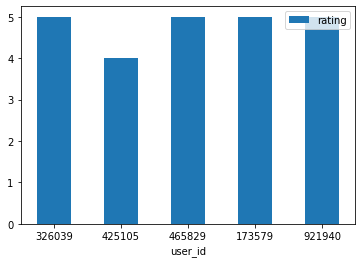

In [12]:
ax = df_plot.plot.bar(x='user_id', y='rating', rot=0)

In [13]:
df_filtered['rating'].describe()

count    203301.000000
mean          4.672131
std           0.817701
min           0.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [14]:
df_filtered['user_id'].nunique()

1368

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


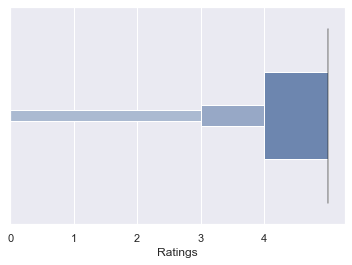

In [15]:
sns.set(style='darkgrid')
ax = sns.boxenplot(x = df_filtered['rating'])
ax.set_xticks(np.arange(0, 5, 1))
ax.set_xlabel('Ratings')
plt.show()

In [16]:
tags_arr = df_raw_recipes['tags']
type(tags_arr)

pandas.core.series.Series

In [17]:
all_tags = df_raw_recipes.tags.str.split(",", expand=True)

## Tag analysis

In [40]:
forbidden_characters = [',', '[', ']', ' ', '', '\'']
all_tags = []
for id, value in df_raw_recipes.iterrows():
    curr_tag = value['tags']
    curr_word = str()
    for curr_char in curr_tag:
        if curr_char not in forbidden_characters:
            curr_word+=curr_char
        else:
            if curr_word != '':
                all_tags.append(curr_word)
                curr_word = str()

In [41]:
tag_tf = {}
for tag in all_tags:
    if tag in tag_tf:
        tag_tf[tag]+=1
    else:
        tag_tf[tag] = 0

In [72]:
tag_tf[sorted(tag_tf, key=tag_tf.get, reverse=True)[5]]    #Outputs most frequent tags

126061

In [81]:
#tag_top_10 = {key:val for key, val in tag_tf.items() if ((val >= 3) or (val <= 1000000))}
tag_top_10 = {key:val for key, val in tag_tf.items() if ((val >= 3000) and (val <= 10000))}
#tag_top_10.pop('beans-side-dishes')
#tag_top_10.pop('breakfast-eggs')
tag_top_10

{'mexican': 6693,
 'fall': 7753,
 'winter': 7653,
 'christmas': 8144,
 'squash': 3695,
 'crock-pot-slow-cooker': 6607,
 'thanksgiving': 4356,
 'heirloom-historical': 4574,
 'apples': 4942,
 'served-cold': 7557,
 'canadian': 4571,
 'south-west-pacific': 3933,
 'spicy': 8224,
 'novelty': 4631,
 'pies-and-tarts': 4765,
 'snacks': 7158,
 'no-cook': 6193,
 'refrigerator': 4832,
 'pies': 3209,
 'chocolate': 9388,
 'oamc-freezer-make-ahead': 4231,
 'quick-breads': 5651,
 'tropical-fruit': 5334,
 'berries': 5830,
 'beans': 9532,
 'greens': 4037,
 'southwestern-united-states': 3535,
 'lactose': 4104,
 'spring': 4071,
 'food-processor-blender': 4843,
 'small-appliance': 8521,
 'high-calcium': 4906,
 'very-low-carbs': 9200,
 'sauces': 5555,
 'eggs': 8576,
 'peppers': 3179,
 'gluten-free': 5742,
 'grilling': 4781,
 'picnic': 7801,
 'bar-cookies': 3384,
 'gifts': 6922,
 'casseroles': 6452,
 'ground-beef': 8089,
 'toddler-friendly': 4446,
 'sandwiches': 5831,
 'cakes': 9652,
 'nuts': 7043,
 'yeast':

In [82]:
special_tag = {'tropical-fruit' : 5334, 'chocolate' : 9388, 'no-cook': 6193, 'canadian': 4571, 'quick-breads': 5651, 'mexican' : 6693, 'server-cold' : 7557}

Text(0.5, 1.0, 'Useful tags')

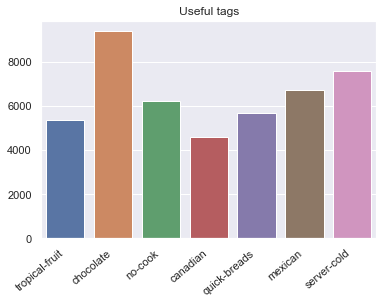

In [83]:
keys = list(special_tag.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(special_tag[k]) for k in keys]
ax = sns.barplot(x=keys, y=vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Useful tags")